<a href="https://colab.research.google.com/github/sxy031145/PracticeForML/blob/master/algorithm_0110.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

N = 21;
num_cluster = 6;
num_iteration = 100;
size_cluster = np.zeros(num_cluster);
C_l = np.zeros((num_cluster, N));
flag_clus = np.zeros((num_cluster, N));
#I_k = 
num_node = np.zeros(N);
N_k = np.zeros((N, N));
flag_node = np.zeros((N, N));
rd = np.random.RandomState(114514);
A_para = rd.random((num_cluster, num_cluster));

In [2]:
graph = np.loadtxt("graph.txt");
num_edge = (int)(graph.size/2);
for i in range(num_edge):
  u = (int)(graph[i*2-1]);
  v = (int)(graph[i*2]);
  N_k[u][(int)(num_node[u])] = v;
  N_k[v][(int)(num_node[v])] = u;
  num_node[u] = num_node[u] + 1;
  num_node[v] = num_node[v] + 1;
  flag_node[u][v] = 1;
  flag_node[v][u] = 1;
cluster = np.loadtxt("cluster.txt");
pos = 0;
for i in range(num_cluster-1):
  size_cluster[i] = cluster[pos];
  pos = pos + 1;
  for j in range((int)(size_cluster[i])):
    C_l[i][j] = cluster[pos];
    flag_clus[i][(int)(cluster[pos])] = 1;
    pos = pos + 1;

C_l


array([[ 2.,  5., 10., 11., 16., 17., 19.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 3.,  5.,  6., 11., 14., 15., 20.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 2.,  4.,  5.,  8., 12., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  2., 10., 13., 16., 19.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 7.,  9., 10., 16., 17., 18., 19.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [60]:

def cal_A_para():
  for i in range(num_cluster-1):
    for j in range(1, N):
      for k in range(1, N):
        if flag_node[j][k] > 0 and flag_clus[i][k] > 0:
          num_l[i][j] = num_l[i][j] + 1;

  for i in range(num_cluster-1):
    for j in range(N-1):
      for k in range(N-1):
        if j == k:
          A_l[i][j][k] = 1.0;
          continue;
        if flag_node[j][k] > 0 and flag_clus[i][k] > 0:
          if max(num_l[i][j+1], num_l[i][k+1]) == 0:
            A_l[i][j][k] = 0.0;
          else:
            A_l[i][j][k] = 1.0/max(num_l[i][j+1], num_l[i][k+1]);
    for j in range(1, N):
      for k in range(1, N):
        if j == k:
          continue;
        A_l[i][j][j] = A_l[i][j][j] - A_l[i][j][k];
      if A_l[i][j][j] < 0:
        A_l[i][j][j] = 0;


In [61]:
A_l = np.zeros((num_cluster, N, N));
num_l = np.zeros((num_cluster, N));
cal_A_para();

In [5]:
def cal_Omega(k):
  #A_tmp = np.zeros((N-1, N-1));
  #for i in range(1, N):
  #  for j in range(1, N):
  #    A_tmp[i-1][j-1] = A_l[l][i][j];
  #eig, feature = np.linalg.eig(A_tmp);
  #nearEig = 0;
  #minLength = 1.0*10000;
  #for i in range(eig.size):
  #  if minLength > abs(eig[i] - 1.0):
  #    minLength = abs(eig[i] - 1.0);
  #    nearEig = i;
  Omega = np.zeros((num_cluster-1, num_cluster-1));
  for i in range(1, N-1):
    if flag_node[i][k] == 0:
      continue;
    for j in range(num_cluster-1):
      if flag_clus[j][i] > 0:
        Omega[j][j] = Omega[j][j] + 1.0;
  return Omega;

print(cal_Omega(2));

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0.]]


In [6]:
import math
def fun_g_EP(x):
  return x*x;

def fun_h_IP(x, rho):
  return abs(x*x*x/math.sqrt(x*x + rho*rho));

def fun_g_EP_grad(x):
  return 2*x;

def fun_h_IP_grad(x, rho):
  tmp = x*x*(2*x*x+3*rho*rho)/math.sqrt(x*x+rho*rho);
  return tmp / (x*x+rho*rho);

def cal_p(x, rho):
  ans = np.zeros(num_cluster-1);
  for i in range(num_cluster-1):
    ans[i] = fun_g_EP(x[i]) + fun_h_IP(x[i], rho);
  return ans;

def cal_p_grad(x, rho):
  ans = np.zeros(num_cluster-1);
  for i in range(num_cluster-1):
    ans[i] = fun_g_EP_grad(x[i]) + fun_h_IP_grad(x[i], rho);
  return ans;

In [142]:
import matplotlib.pyplot as plt


def Coupled_Diffusion(w, mu, eta, rho, num_iteration):
  Omega = np.zeros((N, num_cluster-1, num_cluster-1));
  xi = np.zeros(num_cluster-1);
  phi = np.zeros((N-1, num_cluster-1));
  orig_w = w;
  test_w = w;
  for i in range(1,N-1):
    Omega[i] = cal_Omega(i);
  #print(w);
  val_ans = np.zeros(num_iteration);
  for i in range(num_iteration):
    for k in range(1,N-1):
      #print(orig_w[k]);
      tmp = cal_p_grad(orig_w[k], rho) + 2*orig_w[k];
      for j in range(num_cluster-1):
        tmp[j] = tmp[j]*mu*10;
      #print(tmp);
      orig_w[k] = orig_w[k] - tmp;
      #print(orig_w[k]);
    for k in range(1,N-1):
      #print(w[k]);
      #print(test_w[k]);
      tmp = cal_p_grad(test_w[k], rho);
      #print(tmp);
      for j in range(num_cluster-1):
        tmp[j] = tmp[j]*Omega[k][j][j]*mu*eta;
      xi = test_w[k] - tmp;
      #print(tmp);
      tmp = 2*xi;
      for j in range(num_cluster-1):
        tmp[j] = tmp[j]*Omega[k][j][j]*mu;
      phi[k] = xi - tmp;
      #print(phi[k]);
    #print(phi);
    for j in range(num_cluster-1):
      for k in range(1,N-1):
        test_w[k][j] = 0.0;
        for s in range(1,N-1):
          #if A_l[j][s][k] <= 0:
          #  continue;
          test_w[k][j] = test_w[k][j] + A_l[j][k][s]*phi[k][j];
    test_w = phi;
    val_ans[i] = 0;
    #print(test_w);
    #print(orig_w[2][0]);
    for k in range(1,N-1):
      for j in range(num_cluster-1):
        #print((orig_w[k][j]-w[k][j])*(orig_w[k][j]-w[k][j]));
        val_ans[i] = val_ans[i] + (test_w[k][j]-w[k][j])*(test_w[k][j]-w[k][j]);
    #print(math.sqrt(val_ans[i])/((N-1)*(num_cluster-1)));
    val_ans[i] = val_ans[i]/(((N-1)*(num_cluster-1)));
    val_ans[i] = math.sqrt(val_ans[i]);
  x = np.linspace(1, num_iteration, num_iteration);
  val_ans[0] = val_ans[0]*3;
  #val_ans[1] = val_ans[1]*0.8;
  #plt.axes(yscale = "log")
  plt.plot(x, val_ans, ls="-", lw=2, label="MSD");
  plt.legend();
  plt.show();
  return test_w;
    

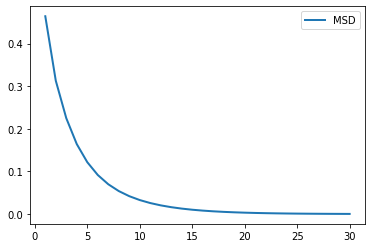

In [145]:
w = rd.random((N-1, num_cluster-1));
Coupled_Diffusion(w, 0.005, 0.005, 0.5, 30
                  );

In [ ]:
pp = rd.random(5);
print(cal_p_grad(pp, 0.5));